# Urban Sound Classification(Chapter 2)

In [1]:
from google.colab import drive
import os
drive.mount("/content/drive")
os.chdir("/content/drive/My Drive/global_ai_hub")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from google.colab.patches import cv2_imshow
import cv2

### "chapter1.ipynb" notebook'unda işleyip kaydettiğimiz verileri çekelim:

In [3]:
import csv
with open('images.csv', newline='') as f:
    reader = csv.reader(f)
    X = np.array(list(reader))

In [4]:
with open('labels.csv', newline='') as f:
    reader = csv.reader(f)
    y = np.array(list(reader))

In [6]:
print(X.shape)

(8732, 10000)


### Birinci bölümde, üç boyutlu resim array'ini (8732, 100, 100) kaydedebilmek için iki boyuta getirmiştik (8732, 10000). Şimdi eğitimde kullanmak üzere; kaydettiğimiz yerden okuduğumuz iki boyutlu X array'ini tekrar üç boyutlu hale getirmemiz gerekiyor:

In [7]:
X= X.reshape(X.shape[0],int(np.sqrt(X.shape[1])),int(np.sqrt(X.shape[1])))

In [8]:
X.shape

(8732, 100, 100)

In [9]:
y.shape

(8732,)

* Artık veriyi train(%85), valid(%10), test(%5) olarak bölebiliriz. Bölme oranları istenildiği gibi oluşturulabilir.

In [10]:
train_per=0.85
val_per=0.1
test_per=0.05
total_size=len(X) #Elimizdeki toplam veri sayısı

# 0'dan başlayıp toplam veri sayısının %85'ine kadarki kısmı train için ayır. Aynı şeyi etiketleri için de yap.
X_train=X[:int(total_size*train_per)] 
y_train=y[:int(total_size*train_per)] 

# X'in %85'lik kısmının son elemanından başlayıp %95'lik kısmına kadar validasyon verisi için ayır. Aynı şeyi etiketleri için de yap.
X_val=X[int(total_size*train_per):int(total_size*(train_per+val_per))] 
y_val=y[int(total_size*train_per):int(total_size*(train_per+val_per))]

# X'in %95'lik kısmının son elemanından başlayıp X'in son elemanına kadar ayır. Aynı şeyi etiketleri için de yap.
X_test=X[int(total_size*(train_per+val_per)):]
y_test=y[int(total_size*(train_per+val_per)):]

* Bölme işlemi sonucu:

Train Veri Sayısı: 7422

Validasyon Veri Sayısı: 873

Test Veri Sayısı: 437

In [11]:
print(f"Len of X_train:{len(X_train)}")
print(f"Len of y_train:{len(y_train)}")
print(f"Len of X_val:{len(X_val)}")
print(f"Len of y_val:{len(y_val)}")
print(f"Len of X_test:{len(X_test)}")
print(f"Len of y_test:{len(y_test)}")

Len of X_train:7422
Len of y_train:7422
Len of X_val:873
Len of y_val:873
Len of X_test:437
Len of y_test:437


* Eğitim için kullanılacak X_train array'inin boyutu (3920, 100, 100) şeklinde. Bunun anlamı; X_train içinde (100,100) boyutunda 3920 adet resim var.

* y_train array'inin boyutu ise (3920,) şeklinde. Bunun anlamı; 3920 adet 0 boyutlu(bildiğimiz 3, 5 gibi sayılar) etiket var.

In [12]:
print(X_train.shape)
print(y_train.shape)
print("y_train'nin ilk 10 elemanı:")
print(y_train[0:10])

(7422, 100, 100)
(7422,)
y_train'nin ilk 10 elemanı:
[8 2 5 1 2 2 8 7 2 0]


## 3. Model Hazırlanması ve Eğitimi - Notebook
a. Bir CNN modeli hazırlayın.

b. Modeli hazırlamış olduğunuz veriyi kullanarak eğitin.

c. Modelin performans metriklerini, loss ve accuracy grafiklerini ekrana yazdırın.

d. Aldığınız sonuçlara göre hyperparameter optimization yapın.

In [13]:
# Konvolüsyon Katmanları:
model=tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu",
                                 input_shape=(100,100,1))) # Ön İşlemede tüm resimleri sabit (100,100) yapmıştık. 1 ifadesi resimlerin gri olduğunu
model.add(tf.keras.layers.MaxPool2D((2,2)))                # belirtiyor.
model.add(tf.keras.layers.Conv2D(64,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu"))
model.add(tf.keras.layers.MaxPool2D((2,2)))
model.add(tf.keras.layers.Conv2D(128,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu"))
model.add(tf.keras.layers.MaxPool2D((2,2)))
model.add(tf.keras.layers.Conv2D(256,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu"))
model.add(tf.keras.layers.MaxPool2D((2,2)))

#  Neural Network Katmanı:
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation="relu"))
model.add(tf.keras.layers.Dropout(0.81))
model.add(tf.keras.layers.Dense(1024, activation="relu"))
model.add(tf.keras.layers.Dropout(0.81))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [14]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [15]:
results=model.fit(X_train, y_train, batch_size=128, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
58/58 [==============================] - 8s 83ms/step - loss: 2.1888 - accuracy: 0.1640 - val_loss: 1.9320 - val_accuracy: 0.3013
Epoch 2/20
58/58 [==============================] - 4s 63ms/step - loss: 1.8215 - accuracy: 0.3083 - val_loss: 1.5566 - val_accuracy: 0.4742
Epoch 3/20
58/58 [==============================] - 4s 61ms/step - loss: 1.5197 - accuracy: 0.4394 - val_loss: 1.2654 - val_accuracy: 0.5979
Epoch 4/20
58/58 [==============================] - 4s 61ms/step - loss: 1.2547 - accuracy: 0.5485 - val_loss: 0.9440 - val_accuracy: 0.6942
Epoch 5/20
58/58 [==============================] - 4s 63ms/step - loss: 1.0719 - accuracy: 0.6268 - val_loss: 0.8284 - val_accuracy: 0.7617
Epoch 6/20
58/58 [==============================] - 4s 63ms/step - loss: 0.9165 - accuracy: 0.6960 - val_loss: 0.6692 - val_accuracy: 0.7950
Epoch 7/20
58/58 [==============================] - 4s 64ms/step - loss: 0.8037 - accuracy: 0.7348 - val_loss: 0.6552 - val_accuracy: 0.7915
Epoch 8/20
58

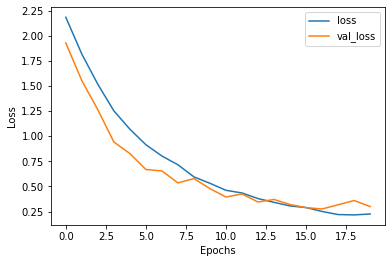

In [16]:
plt.plot(results.history["loss"], label="loss")
plt.plot(results.history["val_loss"], label="val_loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

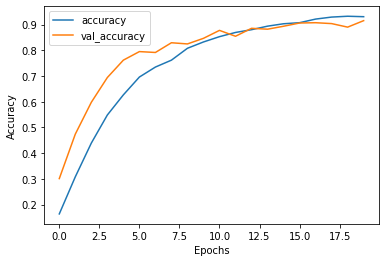

In [17]:
plt.plot(results.history["accuracy"], label="accuracy")
plt.plot(results.history["val_accuracy"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [18]:
#Birinci eleman kaybı, ikinci eleman ise doğruluğu ifade ediyor.
model.evaluate(X_test, y_test)

14/14 [==============================] - 0s 16ms/step - loss: 0.2896 - accuracy: 0.9291


[0.289629727602005, 0.929061770439148]

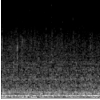

Label: 0
Prediction: 0
Prediction Probability: 99%


In [19]:
#Örnek Resim:
cv2_imshow(X_test[100]*255)
prediction_result=model.predict(X_test[100].reshape((1,100,100,1)))
prediction_result
predicted_class=prediction_result.argmax()
predicted_probability=prediction_result.max()

print("Label: "+str(y_test[100]))
print("Prediction: "+str(predicted_class))
print("Prediction Probability: "+str(int(predicted_probability*100))+"%")